### Instalar libs

```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Carregar dataset

In [80]:
src = r'db\queimadas.csv'
df = pd.read_csv(src)

print(df.head())

              DataHora  Satelite    Pais      Estado               Municipio  \
0  2024/08/28 16:28:00  AQUA_M-T  Brasil  PERNAMBUCO                   PEDRA   
1  2024/08/28 16:28:00  AQUA_M-T  Brasil       PIAUÍ       SÃO JOSÉ DO PEIXE   
2  2024/08/28 16:28:00  AQUA_M-T  Brasil       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   
3  2024/08/28 16:28:00  AQUA_M-T  Brasil       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   
4  2024/08/28 16:28:00  AQUA_M-T  Brasil       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   

      Bioma  DiaSemChuva  Precipitacao  RiscoFogo  Latitude  Longitude    FRP  
0  Caatinga           41           0.0        1.0  -8.52705  -36.93147   10.3  
1  Caatinga           48           0.0        1.0  -7.40538  -42.41065  163.8  
2  Caatinga           48           0.0        1.0  -7.40376  -42.41463  141.0  
3  Caatinga           49           0.0        1.0  -7.40056  -42.37107   56.1  
4  Caatinga           49           0.0        1.0  -7.39868  -42.37510   73.3  


#### Mostrar informações gerais do DataFrame

In [81]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DataHora      3552 non-null   object 
 1   Satelite      3552 non-null   object 
 2   Pais          3552 non-null   object 
 3   Estado        3552 non-null   object 
 4   Municipio     3552 non-null   object 
 5   Bioma         3552 non-null   object 
 6   DiaSemChuva   3552 non-null   int64  
 7   Precipitacao  3552 non-null   float64
 8   RiscoFogo     3552 non-null   float64
 9   Latitude      3552 non-null   float64
 10  Longitude     3552 non-null   float64
 11  FRP           3552 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 333.1+ KB
None


#### Estatística Descritiva

In [82]:
print(df.describe())

       DiaSemChuva  Precipitacao    RiscoFogo     Latitude    Longitude  \
count  3552.000000   3552.000000  3552.000000  3552.000000  3552.000000   
mean     55.141047      0.050203    -0.170541   -10.846472   -55.757538   
std      44.303319      0.453411    33.542419     4.726581     4.532166   
min       0.000000      0.000000  -999.000000   -32.328790   -72.778510   
25%      11.000000      0.000000     1.000000   -12.487540   -59.215263   
50%      48.000000      0.000000     1.000000    -9.406025   -55.503875   
75%      99.000000      0.000000     1.000000    -8.024142   -52.545990   
max     120.000000     16.060000     1.000000    -1.618010   -36.931470   

               FRP  
count  3552.000000  
mean     76.880574  
std     129.570034  
min       3.200000  
25%      19.200000  
50%      37.700000  
75%      81.000000  
max    2080.600000  


#### Verificar existência de valores nulos

In [83]:
print(df.isnull().sum())

DataHora        0
Satelite        0
Pais            0
Estado          0
Municipio       0
Bioma           0
DiaSemChuva     0
Precipitacao    0
RiscoFogo       0
Latitude        0
Longitude       0
FRP             0
dtype: int64


#### Normalizar os textos

Garantir que os textos estejam em letras maiusculas

In [84]:
columns_to_upper = ['Estado', 'Municipio', 'Pais', 'Bioma']
df[columns_to_upper] = df[columns_to_upper].apply(lambda x: x.str.upper())

print(df.head())

              DataHora  Satelite    Pais      Estado               Municipio  \
0  2024/08/28 16:28:00  AQUA_M-T  BRASIL  PERNAMBUCO                   PEDRA   
1  2024/08/28 16:28:00  AQUA_M-T  BRASIL       PIAUÍ       SÃO JOSÉ DO PEIXE   
2  2024/08/28 16:28:00  AQUA_M-T  BRASIL       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   
3  2024/08/28 16:28:00  AQUA_M-T  BRASIL       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   
4  2024/08/28 16:28:00  AQUA_M-T  BRASIL       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   

      Bioma  DiaSemChuva  Precipitacao  RiscoFogo  Latitude  Longitude    FRP  
0  CAATINGA           41           0.0        1.0  -8.52705  -36.93147   10.3  
1  CAATINGA           48           0.0        1.0  -7.40538  -42.41065  163.8  
2  CAATINGA           48           0.0        1.0  -7.40376  -42.41463  141.0  
3  CAATINGA           49           0.0        1.0  -7.40056  -42.37107   56.1  
4  CAATINGA           49           0.0        1.0  -7.39868  -42.37510   73.3  


#### Normalizar e codificar dados categoricos

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# df['Estado'] = label_encoder.fit_transform(df['Estado'])
print(df.head())

              DataHora  Satelite    Pais      Estado               Municipio  \
0  2024/08/28 16:28:00  AQUA_M-T  BRASIL  PERNAMBUCO                   PEDRA   
1  2024/08/28 16:28:00  AQUA_M-T  BRASIL       PIAUÍ       SÃO JOSÉ DO PEIXE   
2  2024/08/28 16:28:00  AQUA_M-T  BRASIL       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   
3  2024/08/28 16:28:00  AQUA_M-T  BRASIL       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   
4  2024/08/28 16:28:00  AQUA_M-T  BRASIL       PIAUÍ  SÃO FRANCISCO DO PIAUÍ   

      Bioma  DiaSemChuva  Precipitacao  RiscoFogo  Latitude  Longitude    FRP  
0  CAATINGA           41           0.0        1.0  -8.52705  -36.93147   10.3  
1  CAATINGA           48           0.0        1.0  -7.40538  -42.41065  163.8  
2  CAATINGA           48           0.0        1.0  -7.40376  -42.41463  141.0  
3  CAATINGA           49           0.0        1.0  -7.40056  -42.37107   56.1  
4  CAATINGA           49           0.0        1.0  -7.39868  -42.37510   73.3  


#### Contagem de queimadas por estado

In [86]:
import matplotlib.pyplot as plt

queimadas_por_estado = df['Estado'].value_counts()

#### Criar gráfico de barras

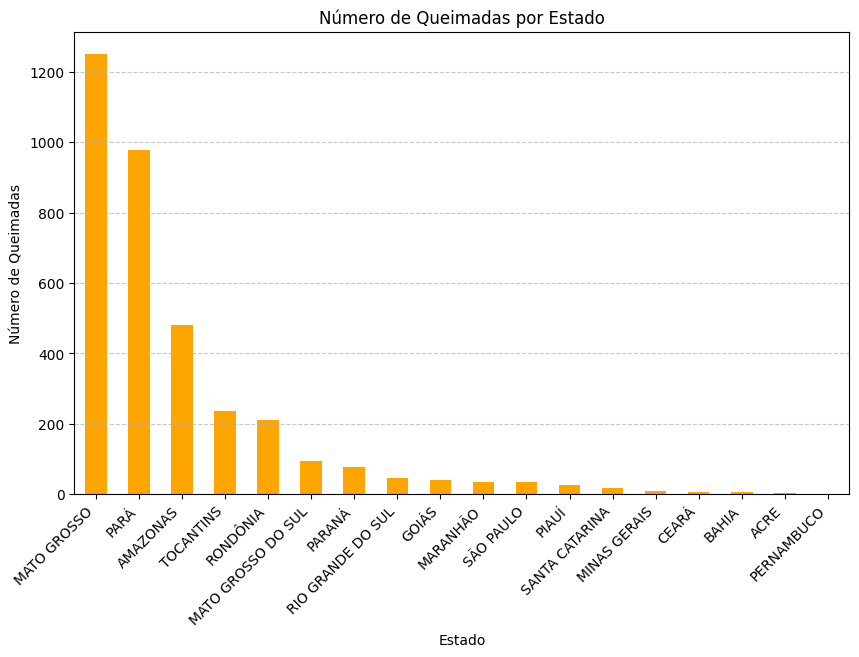

In [87]:
plt.figure(figsize=(10,6))
queimadas_por_estado.plot(kind='bar', color='orange')

# Rotular o Gráfico

plt.title('Número de Queimadas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Queimadas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Criar um gráfico de calor dos focos de queimadas por estado

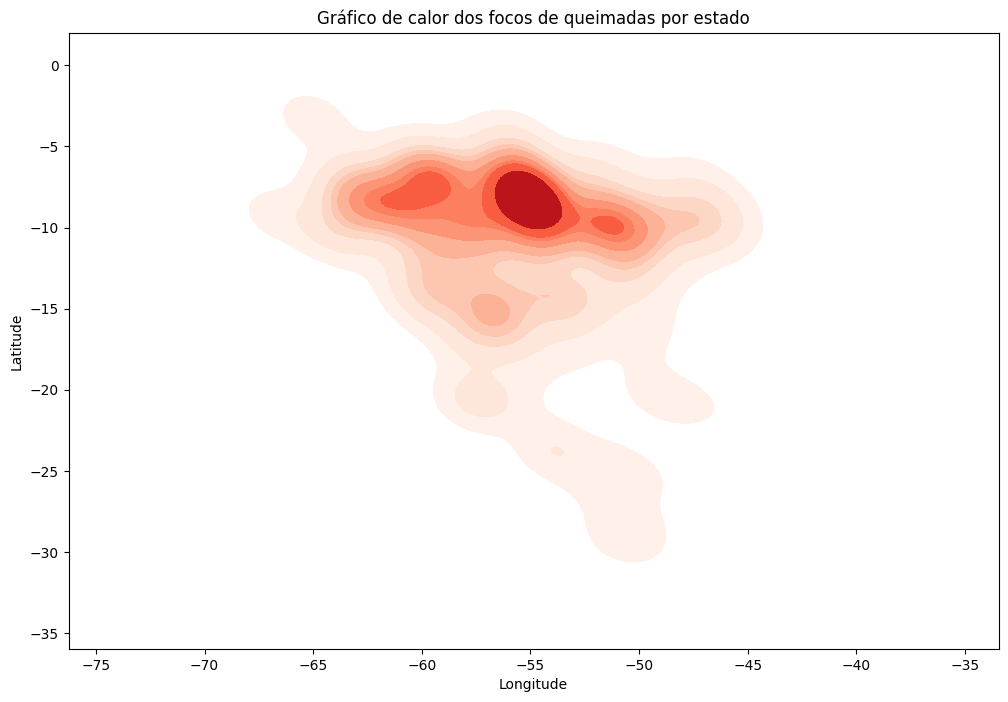

In [88]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.kdeplot(x=df['Longitude'], y=df['Latitude'], cmap='Reds', fill='True', thresh=0.05)
plt.title('Gráfico de calor dos focos de queimadas por estado')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Carregar o mapa do Brasil

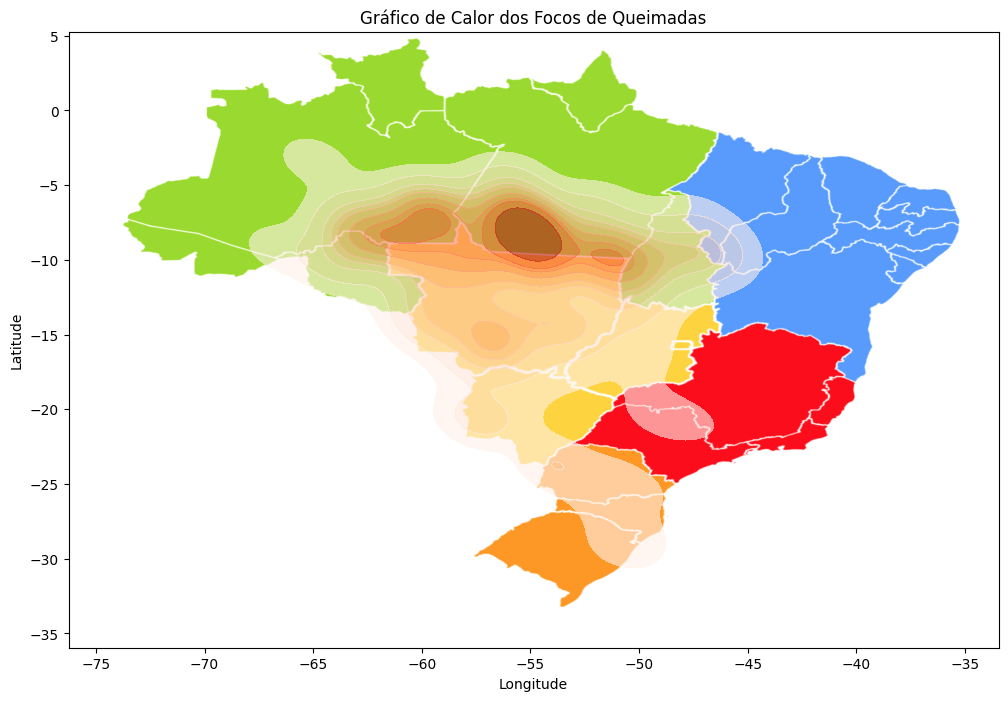

In [89]:
mapa_brasil = plt.imread(r'db\brasil.png')

# Criar o gráfico de calor

plt.figure(figsize=(12,8))

# Ajuste dos limites da imagem conforme necessidade

plt.imshow(mapa_brasil, extent=[-73.99, -34.79, -33.75, 5.27], aspect='auto')
sns.kdeplot(x=df['Longitude'], y=df['Latitude'], cmap='Reds', fill=True, thresh=0.05, alpha=0.6)
plt.title('Gráfico de Calor dos Focos de Queimadas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#### Filtrar dados por estado específico

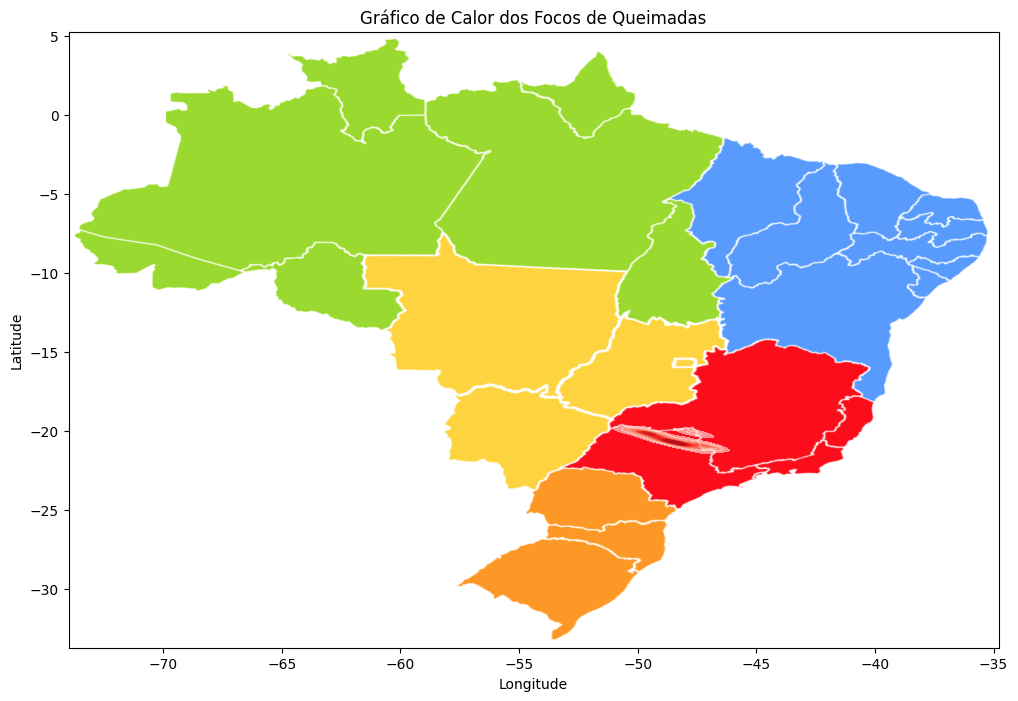

In [90]:
sp = df[df['Estado'].str.upper() == 'SÃO PAULO']

mapa_brasil = plt.imread(r'db\brasil.png')

# Criar o gráfico de calor

plt.figure(figsize=(12,8))

# Ajuste dos limites da imagem conforme necessidade

plt.imshow(mapa_brasil, extent=[-73.99, -34.79, -33.75, 5.27], aspect='auto')
sns.kdeplot(x=sp['Longitude'], y=sp['Latitude'], cmap='Reds', fill=True, thresh=0.05, alpha=0.6)
plt.title('Gráfico de Calor dos Focos de Queimadas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()